In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Function definition and testing

In [2]:
def polyModel(x, theta):
    """ Calculates the value of the polynomial 𝑦(𝑥)=∑𝑖𝜃𝑖𝑥𝑖 for a given x and theta
    Inputs: array of x values, x
            array of polynomial coefficients, theta
    Outputs: array of y(x) values, y """
    #function not expected to work for theta array > 10
    if len(theta) > 10:
        raise ValueError("the length of theta cannot be greater than 10")
    #calculating the polynomial
    exp = np.arange(0,len(theta),1) #creating an integer array of the x exponents
    xv, expv = np.meshgrid(x,exp) #broadcasts x along rows, and theta along collumns
    theta=theta[:,None] #turning theta into a collumn vector by adding a new axis
    y = np.sum(theta*xv**expv, axis=0) #calculating polynomial by summing along the rows to produce a single value for each exponent of x
    return y

In [3]:
def polyModelWithNoise(x,theta,sigma):
    """ Calculates the value of the polynomial 𝑦(𝑥)=∑𝑖𝜃𝑖𝑥𝑖 with added noise for a given x and theta
        Inputs: array of x values, x
                array of polynomial coefficients, theta
                standard deviation of noise distribution, sigma
        Outputs: array of y(x) values with added noise, y_noise """
         #function not expected to work for theta array > 10
    if len(theta) > 10:
        raise ValueError("the length of theta cannot be greater than 10")
    #calculating the polynomial
    exp = np.arange(0,len(theta),1) #creating an integer array of the x exponents
    xv, expv = np.meshgrid(x,exp) #broadcasts x along rows, and theta along collumns
    theta=theta[:,None] #turning theta into a collumn vector by adding a new axis
    y = np.sum(theta*xv**expv, axis=0) #calculating polynomial by summing along the rows to produce a single value for each exponent of x
    #adding noise
    noise = np.random.normal(0,sigma,np.shape(x))
    y_noise = y + noise
    return y_noise

Text(0.5, 1.0, 'Graphical comparision of polyModel with polyModelWithNoise')

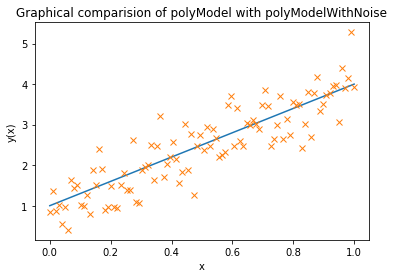

In [11]:
x = np.linspace(0,1,100)
theta = np.array([1,3])
sigma=0.5
plt.plot(x,polyModel(x,theta),label="polyModel")
plt.plot(x,polyModelWithNoise(x,theta,sigma), 'x', label="PolyModelWithNoise")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Graphical comparision of polyModel with polyModelWithNoise")

## Gradient Descent

In [5]:
def polyGradient(x,theta):
    """ calculates the gradient of the polynomial function with respect to the parameters theta
    Inputs: array of x values, x
            array of polynomial coefficients, theta
    Outputs: gradient array of the polynomial functions, grad"""
    exp = np.arange(0,len(theta),1) #creating an integer array of the x exponents
    grad = x[:,None]**exp #dy/d𝜃_i = x**i so the gradient with respect to theta is just the array of x exponentials
    return grad

In [6]:
#initialising values
theta = np.array([-1,0.5])
learning_rate = 0.5
sigma = 0.5
truth_theta = np.array([1,4]) #truth parameters
step_num = 100 #number of loops
MSEarray=np.zeros(step_num) #initialising arrays
theta_array = np.zeros((step_num + 1, len(theta)))
theta_array[0] = theta #intial theta values                      

for n in range(step_num):
    x=np.random.uniform(0,1,10) #10 random x values from a uniform distribution
    y_data = polyModelWithNoise(x,truth_theta,sigma)
    y_model = polyModel(x,theta)
    errors = y_model-y_data #calculating 'residuals'
    MSE = np.average(errors**2) #calculating Mean Square Error values
    MSEarray[n]=MSE 
    grad=np.average(errors[:,None]*polyGradient(x,theta),axis=0) #average gradient of mse with respect to each theta
    theta -= learning_rate*grad #update rule to determine the next value of theta that reduces the mse
    theta_array[n+1]=theta 
    

## Results plotting and higher order polynomials

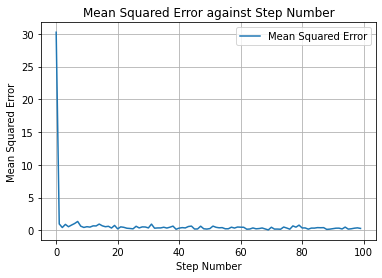

In [13]:
plt.plot(range(step_num), MSEarray, label="Mean Squared Error")
plt.title("Mean Squared Error against Step Number")
plt.xlabel("Step Number")
plt.ylabel("Mean Squared Error")
plt.grid()
plt.legend()

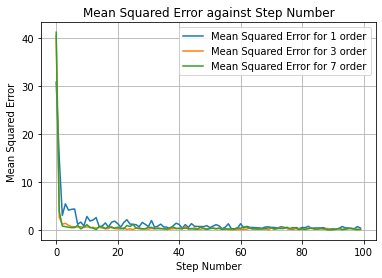

In [8]:
truth_theta=np.array([1,4,3,2])
orders = np.array([1,3,7])
MSEarray=np.zeros(step_num)
plt.figure()

for i in orders:
    theta = np.zeros(i+1) #theta starting point
    theta_array=np.zeros((step_num+1,i+1)) #initialising 2d theta array, rows=steps collumns=polynomial parameter thetas
    for n in range(step_num):
        x=np.random.uniform(0,1,10) #10 random x values from a uniform distribution
        y_data = polyModelWithNoise(x,truth_theta,sigma)
        y_model = polyModel(x,theta)
        errors = y_model-y_data #calculating 'residuals'
        MSE = np.average(errors**2) #calculating Mean Square Error values
        MSEarray[n]=MSE 
        grad=np.average(errors[:,None]*polyGradient(x,theta),axis=0) #average gradient of mse with respect to each theta
        theta -= learning_rate*grad #update rule to determine the next value of theta that reduces the mse
        theta_array[n+1]=theta 
    plt.plot(range(step_num), MSEarray, label=f"Mean Squared Error for {i} order")
    
plt.title("Mean Squared Error against Step Number")
plt.xlabel("Step Number")
plt.ylabel("Mean Squared Error")
plt.grid()
plt.legend()

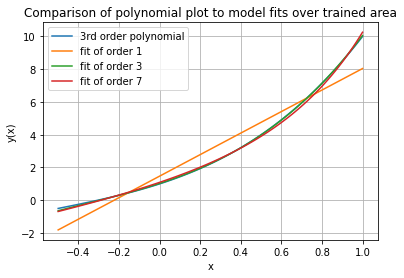

In [9]:
#plotting 3rd order
x=np.linspace(-0.5,1,100) #expanded x array
y=polyModel(x,truth_theta)
plt.figure()
plt.plot(x,y,label="3rd order polynomial")
#plotting best fit models for each order
for i in orders:
    theta = np.zeros(i+1) #theta starting point
    theta_array=np.zeros((step_num+1,i+1)) #initialising 2d theta array, rows=steps collumns=polynomial parameter thetas
    for n in range(step_num):
        y_data = polyModelWithNoise(x,truth_theta,sigma)
        y_model = polyModel(x,theta)
        errors = y_model-y_data #calculating 'residuals'
        MSE = np.average(errors**2) #calculating Mean Square Error values
        MSEarray[n]=MSE 
        grad=np.average(errors[:,None]*polyGradient(x,theta),axis=0) #average gradient of mse with respect to each theta
        theta -= learning_rate*grad #update rule to determine the next value of theta that reduces the mse
        theta_array[n+1]=theta 
    theta_result = theta_array[-1] #final optimal theta value
    model_fit=polyModel(x,theta_result)
    plt.plot(x,model_fit,label=f"fit of order {i}")

plt.title("Comparison of polynomial plot to model fits over trained area")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid()
plt.legend()

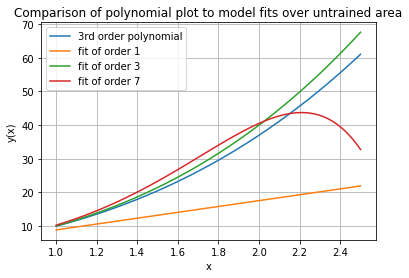

In [10]:
#plotting 3rd order
x=np.linspace(-0.5,1,10) #expanded x array
x_train=np.linspace(0,1,10)
x_untrained=np.linspace(1,2.5,100)
y=polyModel(x_untrained,truth_theta)
plt.plot(x_untrained,y,label="3rd order polynomial")

#training models for each order
for i in orders:
    theta = np.zeros(i+1) #theta starting point
    theta_array=np.zeros((step_num+1,i+1)) #initialising 2d theta array, rows=steps collumns=polynomial parameter thetas
    for n in range(step_num):
        y_data = polyModelWithNoise(x_train,truth_theta,sigma)
        y_model = polyModel(x_train,theta)
        errors = y_model-y_data #calculating 'residuals'
        MSE = np.average(errors**2) #calculating Mean Square Error values
        MSEarray[n]=MSE 
        grad=np.average(errors[:,None]*polyGradient(x_train,theta),axis=0) #average gradient of mse with respect to each theta
        theta -= learning_rate*grad #update rule to determine the next value of theta that reduces the mse
        theta_array[n+1]=theta 
    theta_result = theta_array[-1] #final optimial theta value
    model_fit=polyModel(x_untrained, theta_result) #creating fit in untrained region from optimal theta
    plt.plot(x_untrained,model_fit, label=f"fit of order {i}") #plotting untrained fit

    
plt.title("Comparison of polynomial plot to model fits over untrained area")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid()
plt.legend()

The first order is an underfit, as a straight line is a bad model for the non-linear polynomial. The third order fits well even outside the training range so is a good fit for the polynomial. The 7th order fit matches the funtion very well in the training range, but deviates from the polynomial outisde the training range. This shows it is overfit to the noise in the training region, and is a bad model for the polynomial function.